<a href="https://colab.research.google.com/github/map72ru/python_data_lib/blob/main/Lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема “Обучение без учителя”

#### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [36]:
import numpy as np
import pandas as pd
import matplotlib as mt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

from sklearn.preprocessing import StandardScaler

ss = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=boston.feature_names)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=boston.feature_names)

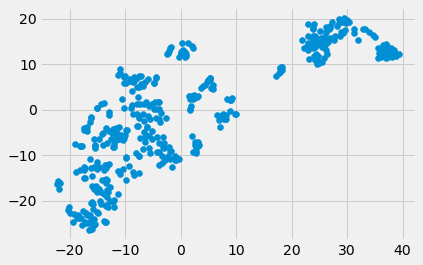

In [39]:
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.
from sklearn.manifold import TSNE

model = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = model.fit_transform(X_train_scaled)
mt.pyplot.style.use('fivethirtyeight')
mt.pyplot.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

mt.pyplot.show()

#### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


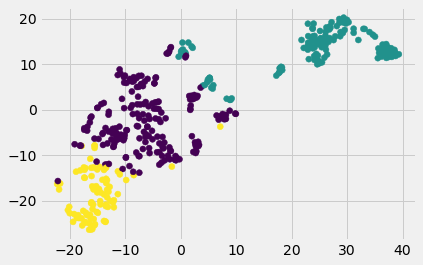

In [40]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = model.fit_predict(X_train_scaled)

mt.pyplot.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

mt.pyplot.show()

In [42]:
# Вычислите средние значения price и CRIM в разных кластерах.
cols = {'price': y_train, 'CRIM': X_train['CRIM']}

for c in cols.keys():
  for n in [0,1,2]:
    print(f'attribute={c} cluster={n} mean={cols[c][labels_train == n].mean()}')


attribute=price cluster=0 mean=24.958115183246072
attribute=price cluster=1 mean=16.165354330708663
attribute=price cluster=2 mean=27.78837209302326
attribute=CRIM cluster=0 mean=0.42166020942408367
attribute=CRIM cluster=1 mean=10.797028425196853
attribute=CRIM cluster=2 mean=0.07356558139534886


#### * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [45]:
labels_test = model.predict(X_test_scaled)

cols = {'price': y_test, 'CRIM': X_test['CRIM']}

for c in cols.keys():
  for n in [0,1,2]:
    print(f'attribute={c} cluster={n} mean={cols[c][labels_test == n].mean()}')

attribute=price cluster=0 mean=21.860784313725492
attribute=price cluster=1 mean=16.43714285714286
attribute=price cluster=2 mean=31.35
attribute=CRIM cluster=0 mean=0.26607882352941176
attribute=CRIM cluster=1 mean=10.165531142857143
attribute=CRIM cluster=2 mean=0.062060000000000004
